### Ejercicio 1:
Modificar la clase OdeSolver incorporando un nuevo mentodo para solucionar una ODE utilizando Runge Kutta de 4to Orden.
Evaluar el mismo caso de prueba y comparar graficamente con los metodos anteriores.

In [0]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt


class OdeSolver:
    '''Clase que implementa metodos para la resolución de ecuaciones diferenciales de primer orden.'''

    def euler(self, f, x0, y0, h=0.01, n=100):
        '''
        Resolución de la ecuacion diferencial 'f' con condiciones iniciales X0 y Y0
        con el metodo de Euler.
        :parameter
        ----------
        f : Ecuación Diferencial Ordinaria a resolver (Es una función sympy)
        x0 : Escalar que representa la condición inicial en el eje x
        y0 : Escalar que representa la condición inicial en el eje y
        h : Valor fijo para el step (valor por defecto = 0.01)
        n : Cantidad de puntos a muestrear para la solución (valor por defecto = 100)

        :return
        Retornar un array de longitud n con las muestras de la solucion numerica.
        '''
        rta = np.ndarray([n, 2])
        for i in range(n):
            rta[i, 0] = x0
            rta[i, 1] = y0
            F = f.subs('x',x0).subs('y', y0)
            F = y0 + h*F
            x0 += h
            y0 = F
        return rta
    
    def rk2(self, f, x0, y0, h=0.01, n=100):
        '''
        Resolución de la ecuacion diferencial 'f' con condiciones iniciales X0 y Y0
        con el metodo de Runge Kutta de 2do Orden
        :parameter
        ----------
        f : Ecuación Diferencial Ordinaria a resolver (Es una función sympy)
        x0 : Escalar que representa la condición inicial en el eje x
        y0 : Escalar que representa la condición inicial en el eje y
        h : Valor fijo para el step (valor por defecto = 0.01)
        n : Cantidad de puntos a muestrear para la solución (valor por defecto = 100)

        :return
        Retornar un array de longitud n con las muestras de la solucion numerica.
        '''
        rta = np.ndarray([n, 2])
        for i in range(n):
            rta[i, 0] = x0
            rta[i, 1] = y0
            
            k1 = f.subs('x', x0).subs('y', y0)
            k2 = f.subs('x', x0+h).subs('y', y0+h*k1) 
            
            x0 += h
            y0 += h * (k1 + k2)/2
        return rta

    def rk4(self, f, x0, y0, h=0.01, n=100):     
      
      '''
        Resolución de la ecuacion diferencial 'f' con condiciones iniciales X0 y Y0
        con el metodo de Runge Kutta de 4do Orden
        :parameter
        ----------
        f : Ecuación Diferencial Ordinaria a resolver (Es una función sympy)
        x0 : Escalar que representa la condición inicial en el eje x
        y0 : Escalar que representa la condición inicial en el eje y
        h : Valor fijo para el step (valor por defecto = 0.01)
        n : Cantidad de puntos a muestrear para la solución (valor por defecto = 100)

        :return
        Retornar un array de longitud n con las muestras de la solucion numerica.
        '''

      rta = np.ndarray([n, 2])
      for i in range(n):
        rta[i, 0] = x0
        rta[i, 1] = y0

        k1 = f.subs('x',x0).subs('y',y0)
        k2 = f.subs('x', x0+(1/2)*h).subs('y',y0+(1/2)*h*k1)
        k3 = f.subs('x', x0+(1/2)*h).subs('y',y0+(1/2)*h*k2)
        k4 = f.subs('x',x0+h).subs('y',y0+h*k3)
      
        x0+=h
        y0+=h * (k1 + 2*k2 + 2*k3 + k4)/6 
      return rta

Método: Euler
[[0.00000000e+00 1.24000000e+00]
 [3.00000000e-02 1.34410000e+00]
 [6.00000000e-02 1.45733711e+00]
 [9.00000000e-02 1.58051932e+00]
 [1.20000000e-01 1.71452641e+00]
 [1.50000000e-01 1.86031630e+00]
 [1.80000000e-01 2.01893206e+00]
 [2.10000000e-01 2.19150936e+00]
 [2.40000000e-01 2.37928478e+00]
 [2.70000000e-01 2.58360470e+00]
 [3.00000000e-01 2.80593507e+00]
 [3.30000000e-01 3.04787198e+00]
 [3.60000000e-01 3.31115319e+00]
 [3.90000000e-01 3.59767070e+00]
 [4.20000000e-01 3.90948436e+00]
 [4.50000000e-01 4.24883675e+00]
 [4.80000000e-01 4.61816928e+00]
 [5.10000000e-01 5.02013977e+00]
 [5.40000000e-01 5.45764154e+00]
 [5.70000000e-01 5.93382412e+00]
 [6.00000000e-01 6.45211584e+00]
 [6.30000000e-01 7.01624829e+00]
 [6.60000000e-01 7.63028291e+00]
 [6.90000000e-01 8.29863991e+00]
 [7.20000000e-01 9.02612957e+00]
 [7.50000000e-01 9.81798624e+00]
 [7.80000000e-01 1.06799052e+01]
 [8.10000000e-01 1.16180826e+01]
 [8.40000000e-01 1.26392584e+01]
 [8.70000000e-01 1.37507637e+

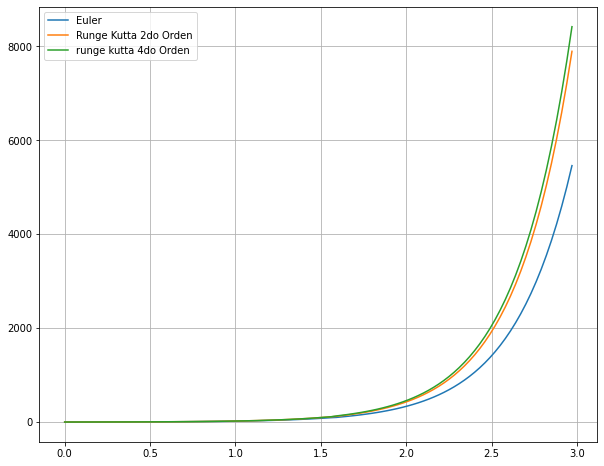

In [264]:
import numpy as np
import sympy as sy
from sympy.functions import cos, exp
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10.0, 8.0]

solver = OdeSolver()
x = sy.Symbol('x')
y = sy.Symbol('y')
f = 3*y - (0.5*exp(x)) / (2*cos(x))

points_euler = solver.euler(f, 0, 1.24, h=0.03)
print('Método: Euler')
print(points_euler)
points_rk2 = solver.rk2(f, 0, 1.24, h=0.03)
print('Método: Runge Kutta 2do Orden')
print(points_rk2)
points_rk4 = solver.rk4(f, 0, 1.24, h=0.03)
print('Método: Runge Kutta 4do Orden')
print(points_rk4)

plt.plot(points_euler[:, 0], points_euler[:, 1], label='Euler')
plt.plot(points_rk2[:, 0], points_rk2[:, 1], label='Runge Kutta 2do Orden')
plt.plot(points_rk4[:,0],points_rk4[:,1], label= 'runge kutta 4do Orden')


plt.grid(True)
plt.legend()
plt.show()

### Ejercicio 2
1. Buscar una ecuacion diferencial ordinaria basado en un modelo de order >= 2. 
2. Publicar en el foro del curso, creado para tal fin, el modelo elegido con una descripción.
3. Resolver el sistema utilizando [odeint]('https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint'). 
5. Graficar los resultados.

**Aclaración 1:** En el caso de que dos personas elijan el mismo modelo, y el docente interprete que los trabajos son similares, deberan defender su trabajo oralmente.

**Aclaración 2:** En el caso que se detecten trabajos copiados, los dos trabajos pasaran a estar desaprobados (2 dos), sin posibilidad de reentregar el mismo.

In [0]:
#Dividimos la EDO de 2do orden en dos EDO's de 1er orden. (para poder utilizar la funcion odeint)
def model(y,t,h=0.00000001):
    ambiente,cuerpo = y
    dzdx = [(h*((cuerpo-ambiente)**4)),(h*(-1*(cuerpo-ambiente)**4))] 
    return dzdx

In [0]:
#Definimos los coeficientes de la EDO
h=0.00000001 #coeficiente de tranferencia del calor al ambiente (por metro cuadrado)

In [0]:
#Valores de t
t = np.linspace(0,5,1000)
#Condiciones iniciales
y0= [20,500] #[tempAmbiente,tempCuerpo]

In [268]:
#Solucionando la EDO con odeint
from scipy.integrate import odeint
sol = odeint(model,y0,t)
sol

array([[ 20.        , 500.        ],
       [ 22.59951872, 497.40048128],
       [ 25.08995136, 494.91004864],
       ...,
       [185.9976272 , 334.0023728 ],
       [186.02162799, 333.97837201],
       [186.04559768, 333.95440232]])

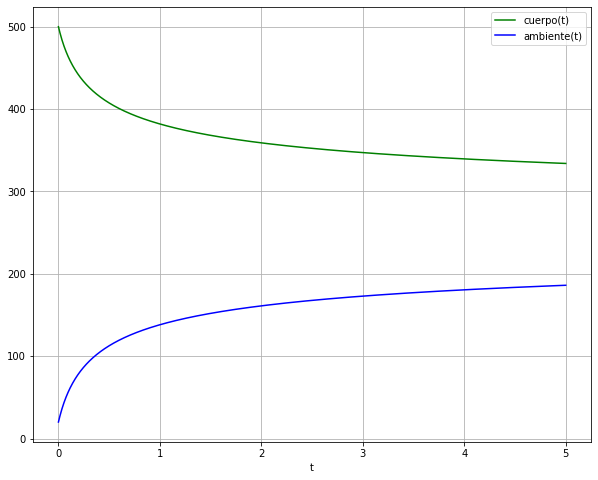

In [269]:
#Graficamos
import matplotlib.pyplot as plt
plt.plot(t, sol[:,1], 'g', label='cuerpo(t)')
plt.plot(t, sol[:,0], 'b', label='ambiente(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()